  status  avgMeasuredTime  avgSpeed  extID  medianMeasuredTime  \
0     OK               66        56    668                  66   
1     OK               69        53    668                  69   
2     OK               69        53    668                  69   
3     OK               70        52    668                  70   
4     OK               64        57    668                  64   

             TIMESTAMP  vehicleCount     _id  REPORT_ID  
0  2014-02-13T11:30:00             7  190000     158324  
1  2014-02-13T11:35:00             5  190449     158324  
2  2014-02-13T11:40:00             6  190898     158324  
3  2014-02-13T11:45:00             3  191347     158324  
4  2014-02-13T11:50:00             6  191796     158324  


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7efcebbaf210> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


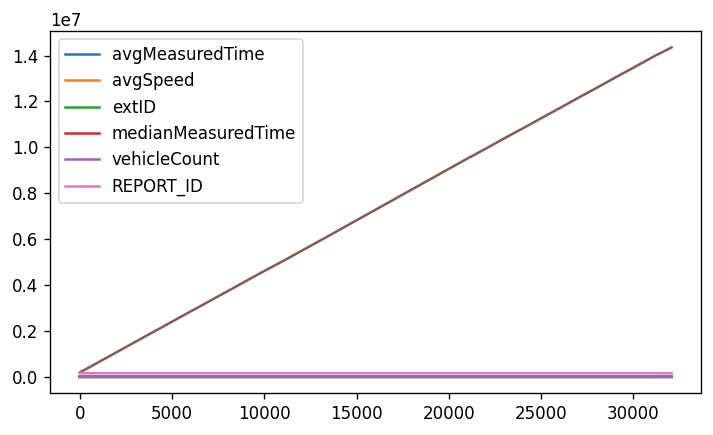

In [ ]:
from sklearn import metrics
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import pandas as pd
from matplotlib import pyplot

dataset = pd.read_csv('/content/trafficData2.csv')
print(dataset.head())
dataset.plot()
pyplot.show()

In [ ]:
avg_time = dataset.avgMeasuredTime.unique()

In [ ]:
updated_dataset = dataset.loc[dataset['avgMeasuredTime']==avg_time[7], :]

train_selector = updated_dataset.TIMESTAMP < '2014-05-01T00:00:00'
train = updated_dataset[train_selector]

test_selector = updated_dataset.TIMESTAMP >= '2014-05-01T00:00:00'
test = updated_dataset[test_selector]

In [ ]:
updated_dataset.reset_index(drop = True, inplace=True)
updated_dataset.head(10000)

,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID
0,OK,61,60,668,61,2014-02-13T12:10:00,10,193592,158324
1,OK,61,60,668,61,2014-02-13T12:50:00,11,197184,158324
2,OK,61,60,668,61,2014-02-13T13:05:00,9,198531,158324
3,OK,61,60,668,61,2014-02-13T13:35:00,6,201225,158324
4,OK,61,60,668,61,2014-02-13T15:45:00,5,212899,158324
...,...,...,...,...,...,...,...,...,...
1496,OK,61,60,668,61,2014-06-08T10:10:00,1,14276184,158324
1497,OK,61,60,668,61,2014-06-08T10:15:00,0,14276633,158324
1498,OK,61,60,668,61,2014-06-08T10:20:00,0,14277082,158324
1499,OK,61,60,668,61,2014-06-08T10:25:00,1,14277531,158324


In [ ]:
new_dataset = train.loc[:,['TIMESTAMP','vehicleCount']]
new_dataset['TIMESTAMP'] =  pd.to_datetime(new_dataset['TIMESTAMP'])
new_dataset.set_index('TIMESTAMP', inplace=True)
new_dataset.head(1000)

,vehicleCount
TIMESTAMP,
2014-02-13 12:10:00,10
2014-02-13 12:50:00,11
2014-02-13 13:05:00,9
2014-02-13 13:35:00,6
2014-02-13 15:45:00,5
...,...
2014-04-27 15:55:00,2
2014-04-27 20:20:00,1
2014-04-27 20:25:00,2


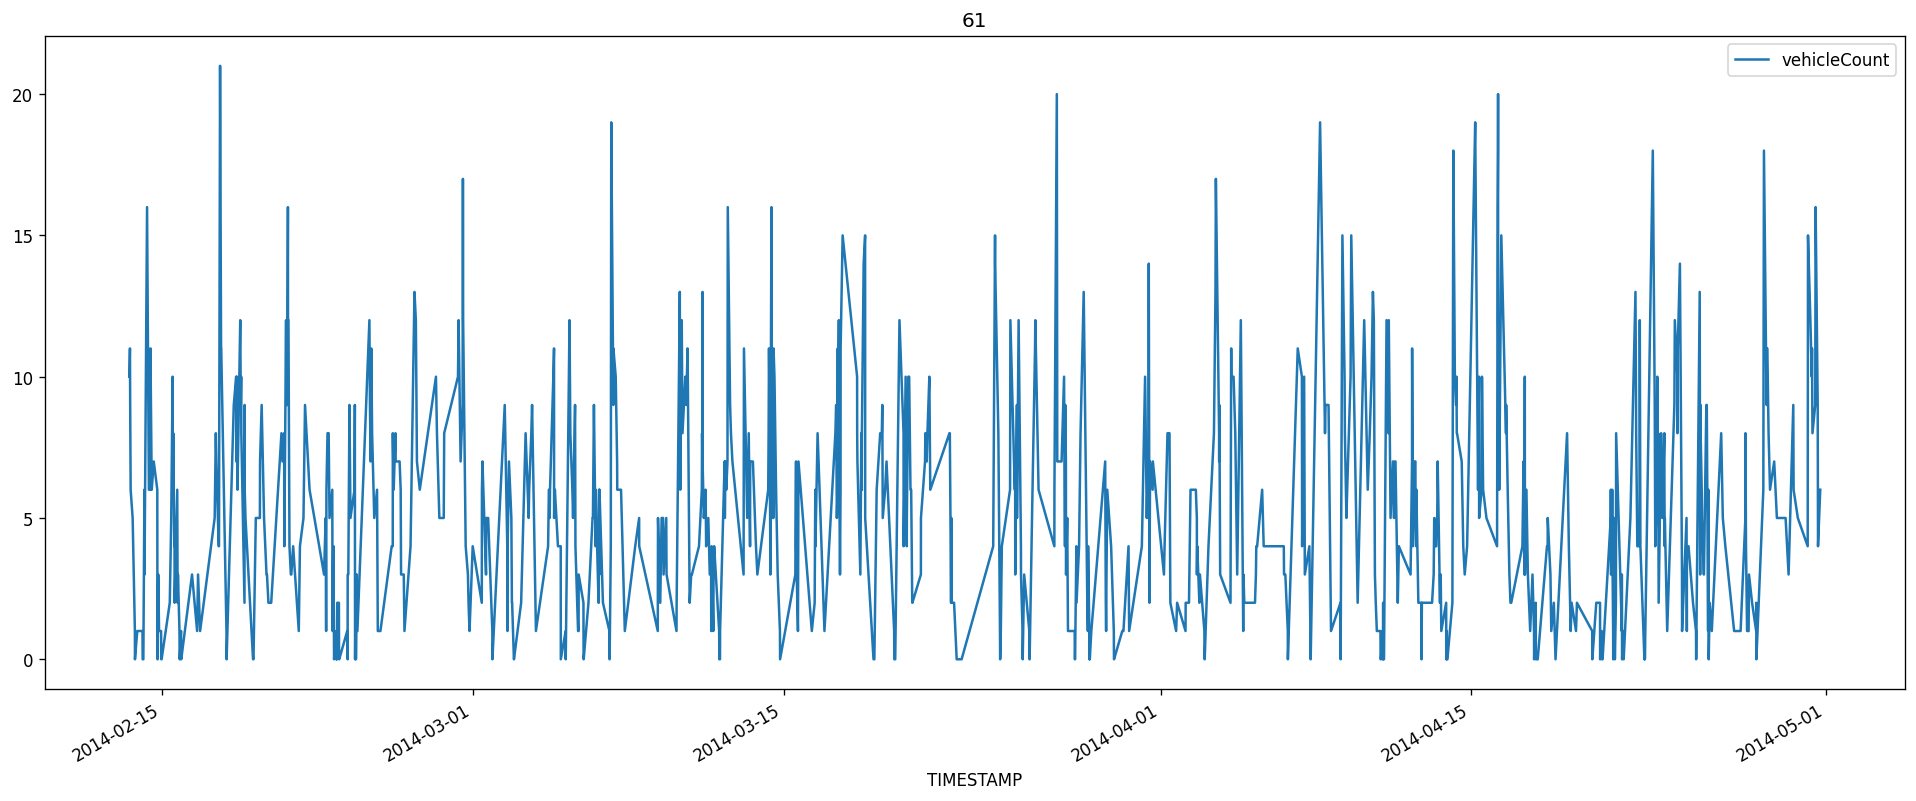

In [ ]:
new_dataset.plot(figsize = (20,8), title = updated_dataset.avgMeasuredTime[0])

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(new_dataset.dropna())
print('ADF Statisiics: %f' % result[0])
print('p-vlaue: %f' % result[1])
print(f'Interface: The time series is {"non-" if result[1]>=0.05 else""}stationary')

ADF Statisiics: -13.107767
p-vlaue: 0.000000
Interface: The time series is stationary


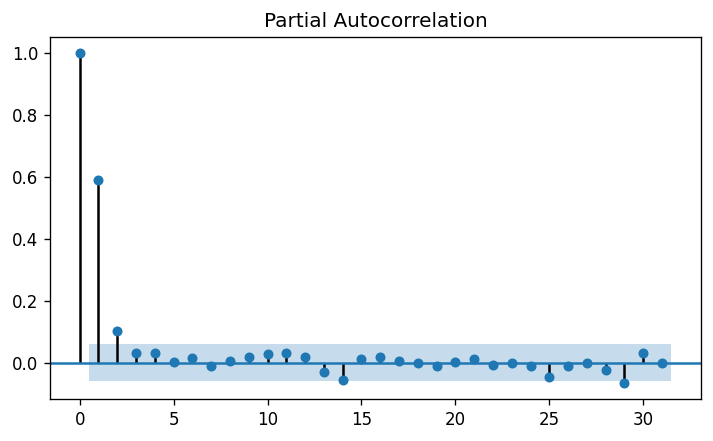

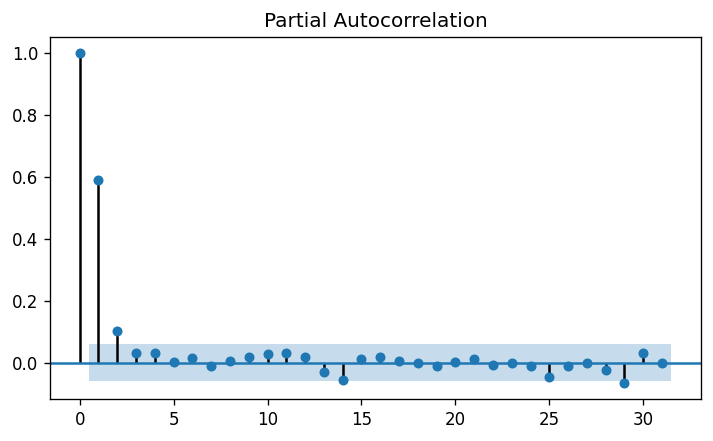

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pyplot.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':120})
plot_pacf(new_dataset.dropna())

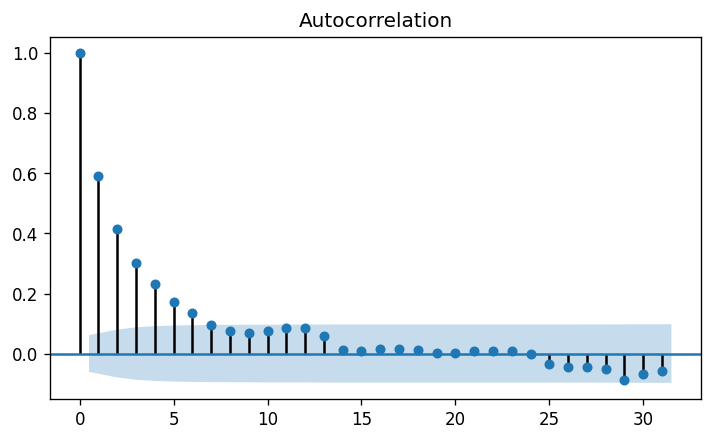

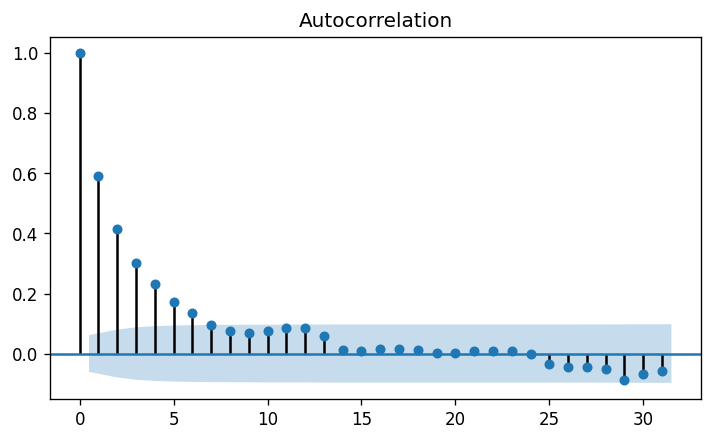

In [ ]:
plot_acf(new_dataset.dropna())

In [ ]:
order = (2,0,5)

model = ARIMA(endog=new_dataset,order=order)
fit=model.fit()
fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           vehicleCount   No. Observations:                 1027
Model:                 ARIMA(2, 0, 5)   Log Likelihood               -2682.942
Date:                Fri, 04 Nov 2022   AIC                           5383.885
Time:                        01:32:24   BIC                           5428.294
Sample:                             0   HQIC                          5400.742
                               - 1027                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4080      0.449      9.827      0.000       3.529       5.287
ar.L1          1.3913      1.185      1.174      0.240      -0.932       3.715
ar.L2         -0.4596      0.937     -0.490      0.624      -2.297       1.378
ma.L1         -0.8638      1.188     -0.727      0.467      -3.193       1.465
ma.L2          0.0852      0.317      0.268      0.788      -0.537       0.707
ma.L3         -0.0097      0.086     -0.113      0.910      -0.178       0.159
ma.L4          0.0180      0.056      0.322      0.748      -0.092       0.128
ma.L5         -0.0203      0.047     -0.427      0.669      -0.113       0.073
sigma2        10.8757      0.409     26.598      0.000      10.074      11.677
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1255.02
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             1.59
Prob(H) (two-sided):                  0.11   Kurtosis:                         7.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = pd.Series(fit.forecast(len(test)))
predictions = predictions.map(lambda x:x if x >= 0 else 0)
print(predictions.head())
actuals = test['vehicleCount']

1027    5.730808
1028    5.428026
1029    5.182011
1030    5.116055
1031    5.016877
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
print("\n MAE : \n ",metrics.mean_absolute_error(predictions, actuals))
print(" \n RMSLE : \n", metrics.mean_squared_log_error(predictions, actuals))
print("\n MAPE :\n", metrics.mean_absolute_percentage_error(predictions, actuals))


 MAE : 
  3.2011915402521494
 
 RMSLE : 
 0.7877116444257248

 MAPE :
 0.7228578876171656


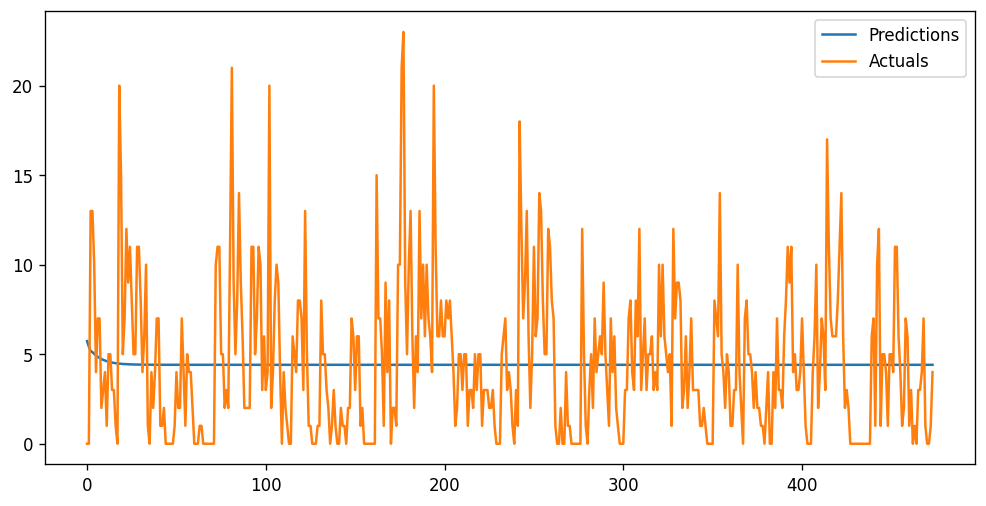

In [ ]:
from cProfile import label


pyplot.figure(figsize=(10,5))
pyplot.plot(predictions.values, label='Predictions')
pyplot.plot(actuals.values, label='Actuals')
pyplot.legend(loc='best')